In [138]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import DistanceMetric

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
#Drive'dan csv formatında tutulan elde edilmiş olan özniteliklerin bulunduğu .csv uzantılı dosyayı okuyoruz  
df = pd.read_csv("/content/drive/MyDrive/ozniteliklerGuncel.csv")

#csv dosyasındaki ilk 5 dosyaya ait öznitelikleri listeliyoruz
df.head()

,filename,chroma_sft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,arabesk97.wav,0.309805,0.160069,1987.898620,2386.070590,4374.915212,0.077087,-101.297920,105.311958,9.100749,29.451788,4.009431,3.495616,4.813166,4.345260,-17.030727,-1.757773,-12.160355,-3.518101,-3.985821,-3.318068,-8.535262,1.866204,-7.377528,5.469159,-2.410178,-1.668989,arabesk
1,arabesk69.wav,0.330102,0.086539,2012.677511,2033.577496,3866.701619,0.103828,-142.886337,112.204796,-24.379759,30.277864,6.596526,9.525859,-3.565216,7.141987,-7.938272,5.691778,-12.291855,-5.929135,-0.552728,-4.900157,-6.029496,-2.747115,-14.357821,2.437822,-6.838944,4.922549,arabesk
2,arabesk70.wav,0.344264,0.156957,2189.079715,2306.408033,4491.839505,0.113211,-75.684418,101.691322,-14.538788,15.784513,0.422744,10.293576,2.506735,12.788445,-9.445118,11.223742,2.345231,5.103718,1.457363,-2.033618,-2.659964,9.913649,-0.666854,14.352630,-1.819569,1.348846,arabesk
3,arabesk68.wav,0.304202,0.109572,2413.169353,2342.607708,4837.387416,0.126748,-113.593895,89.088852,-14.799851,19.503319,0.290750,5.966953,-8.319305,4.537189,-9.663052,5.507977,-9.135820,-0.700420,-5.394728,-5.029300,-9.617834,2.584709,-7.366623,9.366902,1.701080,1.356515,arabesk
4,arabesk71.wav,0.285014,0.123973,1876.955429,2277.894528,4057.275466,0.074829,-119.866486,112.955086,4.335303,21.668198,1.511088,9.883083,-2.455509,10.556302,-11.574791,3.224523,-1.426639,3.486441,-0.000994,-0.338838,-9.421690,4.085955,-6.993758,-0.334080,-4.087308,-0.820091,arabesk


In [141]:
#csv dosyasındaki son 5 dosyaya ait öznitelikleri listeliyoruz
df.tail()


,filename,chroma_sft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
595,rap24.wav,0.406854,0.257684,2957.061389,2694.880880,6009.138664,0.157939,-26.027363,62.614746,-6.766315,19.079746,9.313376,5.788400,2.563352,10.234179,-7.550674,11.284214,0.033284,5.725316,7.569656,2.022748,-4.349519,-2.712170,-6.249690,2.025126,-3.426627,-6.490084,rap
596,rap88.wav,0.392987,0.391632,2040.400620,2509.014162,4691.829962,0.062274,-29.966196,105.273018,13.639367,14.910060,2.109445,5.201437,-2.043074,14.120319,-12.779682,-4.963748,-1.221123,2.436538,-3.273801,4.241679,-7.716446,1.006003,-3.376425,0.240784,-5.541738,0.882324,rap
597,rap67.wav,0.400743,0.307365,2620.996680,2509.886973,5469.650259,0.127860,8.150068,80.540321,-6.365468,28.771231,-4.605390,11.615508,-2.561617,8.026776,-8.861401,8.532795,-0.019873,-3.022855,2.465177,1.212342,-3.424656,-0.490549,-6.420533,3.998738,-6.686697,1.969250,rap
598,rap91.wav,0.472495,0.286480,3355.501239,3040.796619,7104.082043,0.127975,-18.973555,54.307613,16.996738,17.710957,11.586288,18.271011,-2.222001,12.253256,-2.448277,9.043710,2.637179,8.896210,1.603512,9.103068,5.843406,9.132414,-4.671154,0.309432,-5.774984,-2.647220,rap
599,rap25.wav,0.533781,0.279791,2255.496314,2496.339264,4903.662015,0.062192,-93.920624,83.106560,17.574114,33.530239,4.220807,6.031207,6.415910,15.932702,-3.457766,14.923325,4.294558,6.316744,8.675721,7.061596,2.683866,8.545001,2.099720,6.520593,3.369309,1.640418,rap


In [142]:
#mevcut satır-sütun sayılarını gösteriyoruz
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])

Rows : 600
Columns : 28


In [143]:
#dosyaların özniteliklerine ait değerlerin birtakım özelliklerini (ortalama,standart sapma gibi) describe() fonksiyonu ile gösteriyoruz
df.describe()


,chroma_sft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.342577,0.192798,2274.431348,2397.452392,4817.582412,0.097865,-89.428896,95.023858,-3.192734,24.104391,0.397043,5.843991,-2.627965,4.407998,-7.597469,4.656371,-5.097485,1.939730,-3.686411,0.651717,-4.305503,1.506916,-5.336674,1.721989,-4.210087,0.405731
std,0.076339,0.083798,508.697991,396.626082,1219.214915,0.028360,68.735182,23.606959,18.772797,11.871261,10.237239,8.520244,7.703746,6.961387,6.798564,5.997443,5.164776,4.697992,4.393072,4.753822,4.470275,4.329357,4.933312,4.560436,4.326507,4.388463
min,0.189209,0.022946,766.629703,745.927208,1061.960245,0.035646,-370.405029,36.853516,-76.429955,-22.437603,-48.495094,-34.798244,-38.159321,-24.513357,-39.196522,-19.037193,-30.203503,-20.435312,-19.104523,-22.744225,-23.269682,-19.101444,-27.156734,-13.716795,-20.720760,-14.759884
25%,0.281084,0.128239,1922.514273,2179.006860,3946.003222,0.076584,-120.616837,79.394499,-13.182296,16.613365,-4.944328,1.897416,-6.863304,0.337140,-11.582822,1.418478,-8.233479,-0.707589,-6.300728,-2.046833,-6.936856,-0.903258,-8.239427,-1.188486,-6.636309,-2.206107
50%,0.336613,0.191580,2299.940484,2461.766727,4918.541092,0.096816,-76.308151,92.343113,0.350891,24.034374,1.856419,7.158622,-2.212868,5.153792,-7.029894,5.009468,-4.649909,2.337312,-3.503276,0.745882,-4.211849,1.484625,-5.403669,1.699152,-4.246816,0.307651
75%,0.395201,0.250985,2607.233899,2665.187127,5657.751205,0.116465,-42.772514,108.678368,8.931166,31.447155,7.383765,11.596425,2.213452,9.114592,-2.624271,8.418362,-1.826027,5.164004,-0.914871,3.655455,-1.593246,4.128754,-2.519898,4.422180,-1.451700,3.276030
max,0.554932,0.531034,3660.040709,3280.800089,7855.102501,0.195963,82.700600,190.108185,44.004971,74.970917,24.138908,35.442307,25.392092,29.328972,15.594335,27.230028,8.430918,17.235130,14.831096,16.416967,11.494813,19.706083,16.820324,22.550032,15.596196,14.313401


In [144]:
#csv dosyamıza ait sütun bazında veri tipi ve boş eleman var mı yok mu durumlarını kontrol ediyoruz
#df.info()


In [145]:
#sütun bazında boş eleman olmadığını gösteriyoruz (tüm sütunlara başarılı şekilde değer atamışız)
df.isnull().sum()


filename              0
chroma_sft            0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [146]:
#label sütununda hangi türden kaç eleman olduğunu listeliyoruz 
df['label'].value_counts()


rock       100
rap        100
dini       100
pop        100
klasik     100
arabesk    100
Name: label, dtype: int64

In [147]:
### label etiketine ait farklı türden veriler arasındaki ilişkileri gösteren "pairplot" grafiğini seaborn kütüphanesi ile elde ediyoruz.
#sns.pairplot(df,hue='label',size=2)
### BU İŞLEM UZUN SÜRDÜĞÜ İÇİN FARKLI FEATURE'LER İÇİN TEKRAR TEKRAR BU SATIRI ÇALIŞTIRMADIM BİR DEFA ELDE EDİP GRAFİĞİ KAYDETTİM 

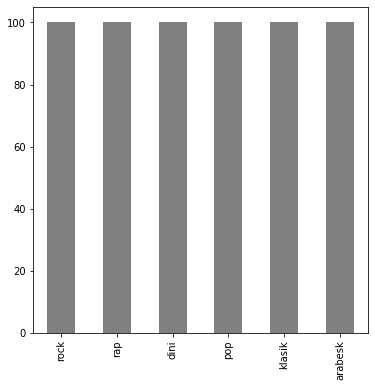

In [148]:
#her bir türe ait eleman sayısının grafiği
df['label'].value_counts().plot.bar(color = 'gray', figsize = (6, 6))


In [149]:
#csv dosyasındaki öznitelikleri (her bir sütundaki ilk eleman) "features" e atayıp tümünü yazdırıyoruz
features = list(df.columns)

print(features)

['filename', 'chroma_sft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [150]:
#burada sınıflandırma başarımını ölçmek için sınıflandırma ölçümüne dahil etmek istemediğimiz öznitelikleri "features" listesinden çıkarıyoruz 
features.remove('label')
features.remove('filename')

print(features)

['chroma_sft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


In [151]:
#Y'ye labelleri atadık X'e ise float'a çevirdiğimiz özniteliklerin değerlerini atadık
Y = df.label
X = df[features].values.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.32, random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

training accuracy : 0.8872549019607843
testing accuracy : 0.7864583333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


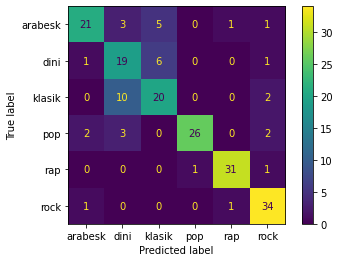

              precision    recall  f1-score   support

     arabesk       0.84      0.68      0.75        31
        dini       0.54      0.70      0.61        27
      klasik       0.65      0.62      0.63        32
         pop       0.96      0.79      0.87        33
         rap       0.94      0.94      0.94        33
        rock       0.83      0.94      0.88        36

    accuracy                           0.79       192
   macro avg       0.79      0.78      0.78       192
weighted avg       0.80      0.79      0.79       192



In [152]:
#modeli oluşturup SVM algoritmasını uyguladık doğruluk değerini ve karmaşıklık matrisini elde edip ekrana çizdirdik çeşitli ölçüm metrikleri için sonuçları elde ettik
model_SVC = SVC(kernel='rbf')
model_SVC.fit(x_train,y_train)
y_pred = model_SVC.predict(x_test)
print("training accuracy :", model_SVC.score(x_train, y_train))
print("testing accuracy :", model_SVC.score(x_test, y_test))
cnf_SVC = SVC(random_state=0)
cnf_SVC.fit(x_train, y_train)
plot_confusion_matrix(cnf_SVC, x_test, y_test)  
plt.show()
print(classification_report(y_test, y_pred))


training accuracy : 0.7058823529411765
testing accuracy : 0.6822916666666666
              precision    recall  f1-score   support

     arabesk       0.65      0.65      0.65        31
        dini       0.47      0.63      0.54        27
      klasik       0.62      0.56      0.59        32
         pop       0.70      0.79      0.74        33
         rap       1.00      0.52      0.68        33
        rock       0.79      0.92      0.85        36

    accuracy                           0.68       192
   macro avg       0.70      0.68      0.67       192
weighted avg       0.71      0.68      0.68       192



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


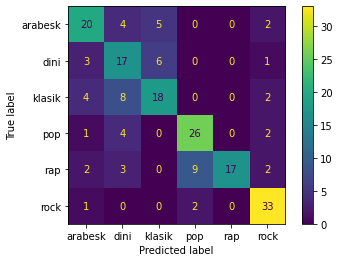

In [153]:
#modeli oluşturup K-NN algoritmasını uyguladık doğruluk değerini ve karmaşıklık matrisini elde edip ekrana çizdirdik çeşitli ölçüm metrikleri için sonuçları elde ettik
knn = KNeighborsClassifier(n_neighbors=10,metric='manhattan')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print("training accuracy :", knn.score(x_train, y_train))
print("testing accuracy :", knn.score(x_test, y_test))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(knn, x_test, y_test)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


training accuracy : 0.8455882352941176
testing accuracy : 0.6770833333333334
              precision    recall  f1-score   support

     arabesk       0.74      0.45      0.56        31
        dini       0.52      0.59      0.55        27
      klasik       0.60      0.56      0.58        32
         pop       0.68      0.76      0.71        33
         rap       0.80      0.85      0.82        33
        rock       0.72      0.81      0.76        36

    accuracy                           0.68       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.68      0.68      0.67       192



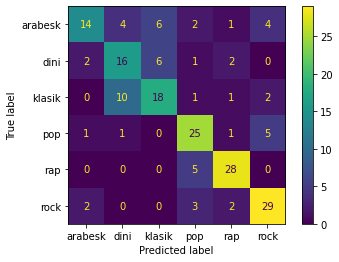

In [154]:
#modeli oluşturup Lojistik Regresyon algoritmasını uyguladık doğruluk değerini ve karmaşıklık matrisini elde edip ekrana çizdirdik çeşitli ölçüm metrikleri için sonuçları elde ettik

model_logisticRegression = LogisticRegression(C = 1000, random_state = 0)

model_logisticRegression.fit(x_train, y_train)
y_pred = model_logisticRegression.predict(x_test)

print("training accuracy :", model_logisticRegression.score(x_train, y_train))
print("testing accuracy :", model_logisticRegression.score(x_test, y_test))

print(classification_report(y_test, y_pred))

plot_confusion_matrix(model_logisticRegression, x_test, y_test)  
plt.show()